In [1]:
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from pylab import rcParams
import statsmodels.api as sm

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta

This code is mostly based on
https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

# Functions

In [2]:
# function to split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [3]:
def LSTM_Predict(df_sales, item_id):
    # get the monthly item count
    df_sales_month = df_sales.loc[(df_sales['item_id']==item_id)].groupby(['date_block_num'])['item_cnt_day'].sum().reset_index(name='item_tot_month')
    # merge into the empty dataframe to have 0's for months with no sales
    df_sales_month = pd.merge(df_sales_month_empty,df_sales_month, how='left', on='date_block_num').fillna(0)
    # define the raw input sequence
    raw_seq = df_sales_month['item_tot_month'].to_list()
    # choose a number of time steps
    n_steps = 5
    # split into samples
    X, y = split_sequence(raw_seq, n_steps)
    n_train = len(raw_seq) - n_steps

    # reshape from [samples, timesteps] into [samples, timesteps, features]
    n_features = 1
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    # define model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    # fit model
    model.fit(X, y, epochs=200, verbose=0)
    # predict using the last n_steps inputs
    x_input = array(raw_seq[n_train:])
    x_input = x_input.reshape((1, n_steps, n_features))
    # print the prediction for November 2015
    yhat = model.predict(x_input, verbose=0)
    return yhat, df_sales_month

In [4]:
def LSTM_Predict_Oct_Error(df_sales, item_id):
    # get the monthly item count
    df_sales_month = df_sales.loc[(df_sales['item_id']==item_id)].groupby(['date_block_num'])['item_cnt_day'].sum().reset_index(name='item_tot_month')
    # merge into the empty dataframe to have 0's for months with no sales
    df_sales_month = pd.merge(df_sales_month_empty,df_sales_month, how='left', on='date_block_num').fillna(0)
    # define the raw input sequence
    raw_seq = df_sales_month['item_tot_month'].to_list()
    Oct2015 = raw_seq[-1]
    raw_seq = raw_seq[:-1]
    # choose a number of time steps
    n_steps = 5
    # split into samples
    X, y = split_sequence(raw_seq, n_steps)
    n_train = len(raw_seq) - n_steps

    # reshape from [samples, timesteps] into [samples, timesteps, features]
    n_features = 1
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    # define model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    # fit model
    model.fit(X, y, epochs=200, verbose=0)
    # predict using the last n_steps inputs
    x_input = array(raw_seq[n_train:])
    x_input = x_input.reshape((1, n_steps, n_features))
    # print the prediction for November 2015
    yhat = model.predict(x_input, verbose=0)
    abs_error = np.absolute(yhat - Oct2015)
    return abs_error, yhat

# Data Reading and Cleaning

In [5]:
df_sales = pd.read_csv('../data/sales_train_v2.csv')
# correct the date
df_sales['date'] = pd.to_datetime(df_sales['date'], dayfirst=True)
# to handle months with no data, first create an empty dataframe with all the dateblocks
df_sales_month_empty = pd.DataFrame({'date_block_num':np.arange(34)})


# Plot of top 5 items with their Prediction

Prediction for Nov 2015 for item_id 20949 is 3382.846


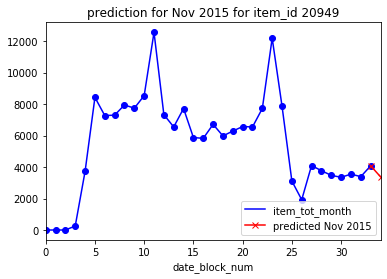

In [6]:
item_to_predict = 20949
yhat, df_sales_month = LSTM_Predict(df_sales, item_to_predict)
point = pd.DataFrame({'date_block_num': [33,34], 'predicted_Nov_2015': [df_sales_month['item_tot_month'][33], yhat[0][0]]})
ax = df_sales_month.plot(x='date_block_num', y='item_tot_month', marker='o', color='b',linestyle='-')
ax = point.plot(ax=ax, x='date_block_num', y='predicted_Nov_2015', 
                marker='x', color='r',linestyle='-',label='predicted Nov 2015',
               title='prediction for Nov 2015 for item_id ' + str(item_to_predict))
print('Prediction for Nov 2015 for item_id ' + str(item_to_predict) + ' is ' + str(yhat[0][0]))

Prediction for Nov 2015 for item_id 2808 is 37.14858


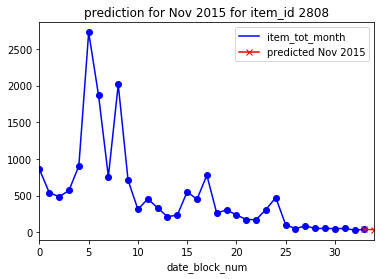

In [7]:
item_to_predict = 2808
yhat, df_sales_month = LSTM_Predict(df_sales, item_to_predict)
point = pd.DataFrame({'date_block_num': [33,34], 'predicted_Nov_2015': [df_sales_month['item_tot_month'][33], yhat[0][0]]})
ax = df_sales_month.plot(x='date_block_num', y='item_tot_month', marker='o', color='b',linestyle='-')
ax = point.plot(ax=ax, x='date_block_num', y='predicted_Nov_2015', 
                marker='x', color='r',linestyle='-',label='predicted Nov 2015',
               title='prediction for Nov 2015 for item_id ' + str(item_to_predict))
print('Prediction for Nov 2015 for item_id ' + str(item_to_predict) + ' is ' + str(yhat[0][0]))

Prediction for Nov 2015 for item_id 3732 is 68.82602


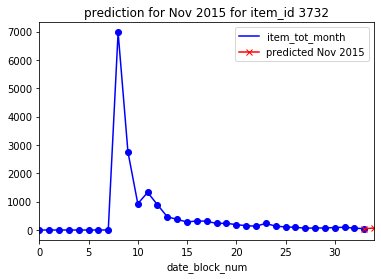

In [8]:
item_to_predict = 3732
yhat, df_sales_month = LSTM_Predict(df_sales, item_to_predict)
point = pd.DataFrame({'date_block_num': [33,34], 'predicted_Nov_2015': [df_sales_month['item_tot_month'][33], yhat[0][0]]})
ax = df_sales_month.plot(x='date_block_num', y='item_tot_month', marker='o', color='b',linestyle='-')
ax = point.plot(ax=ax, x='date_block_num', y='predicted_Nov_2015', 
                marker='x', color='r',linestyle='-',label='predicted Nov 2015',
               title='prediction for Nov 2015 for item_id ' + str(item_to_predict))
print('Prediction for Nov 2015 for item_id ' + str(item_to_predict) + ' is ' + str(yhat[0][0]))

Prediction for Nov 2015 for item_id 17717 is 536.8563


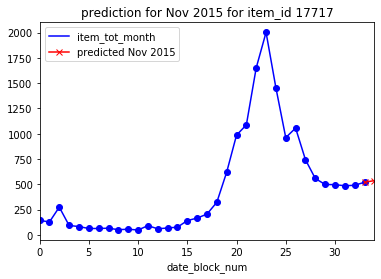

In [9]:
item_to_predict = 17717
yhat, df_sales_month = LSTM_Predict(df_sales, item_to_predict)
point = pd.DataFrame({'date_block_num': [33,34], 'predicted_Nov_2015': [df_sales_month['item_tot_month'][33], yhat[0][0]]})
ax = df_sales_month.plot(x='date_block_num', y='item_tot_month', marker='o', color='b',linestyle='-')
ax = point.plot(ax=ax, x='date_block_num', y='predicted_Nov_2015', 
                marker='x', color='r',linestyle='-',label='predicted Nov 2015',
               title='prediction for Nov 2015 for item_id ' + str(item_to_predict))
print('Prediction for Nov 2015 for item_id ' + str(item_to_predict) + ' is ' + str(yhat[0][0]))

Prediction for Nov 2015 for item_id 5822 is 235.56589


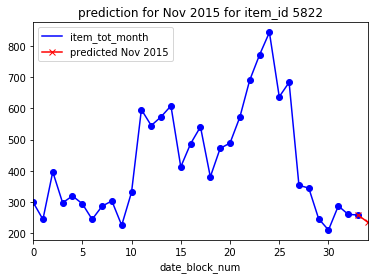

In [10]:
item_to_predict = 5822
yhat, df_sales_month = LSTM_Predict(df_sales, item_to_predict)
point = pd.DataFrame({'date_block_num': [33,34], 'predicted_Nov_2015': [df_sales_month['item_tot_month'][33], yhat[0][0]]})
ax = df_sales_month.plot(x='date_block_num', y='item_tot_month', marker='o', color='b',linestyle='-')
ax = point.plot(ax=ax, x='date_block_num', y='predicted_Nov_2015', 
                marker='x', color='r',linestyle='-',label='predicted Nov 2015',
               title='prediction for Nov 2015 for item_id ' + str(item_to_predict))
print('Prediction for Nov 2015 for item_id ' + str(item_to_predict) + ' is ' + str(yhat[0][0]))

LSTM can provide reasonable predictions for Nov 2015.  Since we plotted by Month, a lot of the noise is smoothed out so this makes it a bit easier for LSTM and to predict the curve.  Our implementation, however, only looks back 5 samples to predict the next one, so the prediction might not take seasonality into account very well.  Since item 17717 does not have much seasonality, LSTM works ok in this case.  On the other hand, Item 20949 does have seasonanity and we can see that LSTM doesn't always do as good a job as Prophet to predict the trend into Nov 2015.

# Get Most Sold Items

In [11]:
df_sales_item_total = df_sales.groupby(['item_id'])['item_cnt_day'].sum().reset_index(name='item_cnt_total')
df_sales_item_total = df_sales_item_total.sort_values(by='item_cnt_total',ascending=False)
df_sales_item_total.head(10)

,item_id,item_cnt_total
20602,20949,187642.0
2749,2808,17245.0
3654,3732,16642.0
17418,17717,15830.0
5717,5822,14515.0
3656,3734,11688.0
6543,6675,10289.0
3653,3731,10099.0
1814,1855,10032.0
16493,16787,9227.0


# RMSE for Oct 2015

In [12]:
total_rmse = 0
number_of_items_to_predict = 10
for index, row in df_sales_item_total.head(number_of_items_to_predict).iterrows():
    abs_error, yhat = LSTM_Predict_Oct_Error(df_sales, row['item_id'])
    print ('Prediction for Oct 2015 for item_id ' + str(row['item_id']) + ' is ' + str(yhat[0][0]), end='')
    print (' and absolute error is ' + str(abs_error[0][0]))
    total_rmse = total_rmse + (np.power(abs_error[0][0], 2))
print ('total rmse for top ' + str(number_of_items_to_predict) + ' items: ' 
       + str(round(np.sqrt(total_rmse/number_of_items_to_predict),1)))

Prediction for Oct 2015 for item_id 20949.0 is 3724.7537 and absolute error is 353.24634
Prediction for Oct 2015 for item_id 2808.0 is 13.3305235 and absolute error is 26.669476
Prediction for Oct 2015 for item_id 3732.0 is 72.81419 and absolute error is 26.814194
Prediction for Oct 2015 for item_id 17717.0 is 375.9797 and absolute error is 145.0203
Prediction for Oct 2015 for item_id 5822.0 is 256.78424 and absolute error is 2.2157593
Prediction for Oct 2015 for item_id 3734.0 is 60.23006 and absolute error is 2.2300606
Prediction for Oct 2015 for item_id 6675.0 is 489.85425 and absolute error is 487.85425
Prediction for Oct 2015 for item_id 3731.0 is 152.33875 and absolute error is 81.661255
Prediction for Oct 2015 for item_id 1855.0 is 283.6508 and absolute error is 278.6508
Prediction for Oct 2015 for item_id 16787.0 is 1729.4822 and absolute error is 1710.4822
total rmse for top 10 items: 582.7


# Make Prediction for Nov 2015

In [13]:
for index, row in df_sales_item_total.head(10).iterrows(): 
    yhat, df_sales_month = LSTM_Predict(df_sales, row['item_id'])
    print ('Prediction for item_id ' + str(row['item_id']) + ' is ' + str(yhat[0][0]))

Prediction for item_id 20949.0 is 4272.615
Prediction for item_id 2808.0 is 21.87106
Prediction for item_id 3732.0 is 51.04313
Prediction for item_id 17717.0 is 255.61781
Prediction for item_id 5822.0 is 226.27982
Prediction for item_id 3734.0 is 48.199047
Prediction for item_id 6675.0 is 345.94464
Prediction for item_id 3731.0 is 92.5119
Prediction for item_id 1855.0 is 93.150696
Prediction for item_id 16787.0 is 6.1796136


The LSTM prediciton for Nov 2015 isn't bad, but some items can go negative, which makes the whole method a bit unreliable, since there can't be a negative item sales in a particular month.  Also, the results for LSTM varies each time it is run, so it is difficult to reproduce good results, in particular, item 20949 can change from 3000 to 4000 in each run.  In most cases Prophet with the Log Scaling is doing a better job at predicting the Nov 2015 sales.  The RMSE for Prophet is better than LSTM if item 17717 is excluded, however, if it is included, LSTM is better.